# Analyse en Composantes Principales (ACP) - Complete PCA Analysis

## Objectif
Ce notebook réalise une analyse complète en composantes principales (ACP) sur le jeu de données 80 Cereals.

### Structure du Notebook (5 Phases)
1. **Phase 1**: Préparation des données & Statistiques
2. **Phase 2**: Choix des dimensions (Valeurs propres)
3. **Phase 3**: Analyse des variables (Colonnes)
4. **Phase 4**: Analyse des individus (Lignes)
5. **Phase 5**: Synthèse et Interprétation

---
# SETUP - Import Libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
np.set_printoptions(precision=4, suppress=True)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


---
# LOAD DATA

In [2]:
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("crawford/80-cereals")
csv_path = os.path.join(path, 'cereal.csv')

# Load data
df = pd.read_csv(csv_path)

# Rename columns (English → French)
column_map = {
    'name': 'Nom', 'mfr': 'Fabricant', 'type': 'Type',
    'calories': 'Calories', 'protein': 'Proteines', 'fat': 'Graisses',
    'sodium': 'Sodium', 'fiber': 'Fibres', 'carbo': 'Glucides',
    'sugars': 'Sucres', 'potass': 'Potassium', 'vitamins': 'Vitamines',
    'shelf': 'Etagere', 'weight': 'Poids', 'cups': 'Tasses', 'rating': 'Note'
}
df = df.rename(columns=column_map)
df = df.set_index('Nom')

print(f"Dataset: {df.shape[0]} individus × {df.shape[1]} variables")
df.head()

c:\Users\saidm\Documents\Data_analysit_python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.24k/2.24k [00:00<00:00, 1.84MB/s]

Extracting files...


Dataset: 77 individus × 15 variables


,Fabricant,Type,Calories,Proteines,Graisses,Sodium,Fibres,Glucides,Sucres,Potassium,Vitamines,Etagere,Poids,Tasses,Note
Nom,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# Select numeric features for PCA (excluding categorical and target)
numeric_cols = ['Calories', 'Proteines', 'Graisses', 'Sodium', 'Fibres',
                'Glucides', 'Sucres', 'Potassium', 'Vitamines', 'Etagere',
                'Poids', 'Tasses']

X_raw = df[numeric_cols].copy()
print(f"Variables sélectionnées: {len(numeric_cols)}")
print(numeric_cols)

Variables sélectionnées: 12
['Calories', 'Proteines', 'Graisses', 'Sodium', 'Fibres', 'Glucides', 'Sucres', 'Potassium', 'Vitamines', 'Etagere', 'Poids', 'Tasses']


---
# PHASE 1: PRÉPARATION DES DONNÉES & STATISTIQUES

**Questions à répondre:**
- Calculer l'individu moyen (moyennes)
- Centrer et standardiser les données (créer la matrice Y)
- Calculer la matrice de corrélation

## 1.1 L'Individu Moyen (Mean Individual)

In [4]:
# Handle missing values first
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), 
                         columns=X_raw.columns, index=X_raw.index)

# Calculate the mean individual (barycentre)
mean_individual = X_imputed.mean()

print("="*60)
print("INDIVIDU MOYEN (BARYCENTRE)")
print("="*60)
print("\nMoyenne de chaque variable:")
print(mean_individual.round(2).to_frame('Moyenne'))

INDIVIDU MOYEN (BARYCENTRE)

Moyenne de chaque variable:
           Moyenne
Calories    106.88
Proteines     2.55
Graisses      1.01
Sodium      159.68
Fibres        2.15
Glucides     14.60
Sucres        6.92
Potassium    96.08
Vitamines    28.25
Etagere       2.21
Poids         1.03
Tasses        0.82


## 1.2 Centrage et Standardisation (Matrice Y)

In [5]:
# Standardize: center (mean=0) and scale (std=1)
scaler = StandardScaler()
Y = scaler.fit_transform(X_imputed)

# Convert to DataFrame
Y_df = pd.DataFrame(Y, columns=X_imputed.columns, index=X_imputed.index)

print("="*60)
print("MATRICE Y (DONNÉES STANDARDISÉES)")
print("="*60)
print(f"\nDimensions: {Y_df.shape[0]} individus × {Y_df.shape[1]} variables")
print(f"\nVérification - Moyennes (≈0): ")
print(Y_df.mean().round(10).to_frame('Moyenne').T)
print(f"\nVérification - Écarts-types (≈1): ")
print(Y_df.std().round(3).to_frame('Écart-type').T)

print("\n\nAperçu des 5 premiers individus standardisés:")
Y_df.head()

MATRICE Y (DONNÉES STANDARDISÉES)

Dimensions: 77 individus × 12 variables

Vérification - Moyennes (≈0): 
         Calories  Proteines  Graisses  Sodium  Fibres  Glucides  Sucres  \
Moyenne      -0.0        0.0       0.0     0.0     0.0       0.0    -0.0   

         Potassium  Vitamines  Etagere  Poids  Tasses  
Moyenne       -0.0        0.0     -0.0   -0.0     0.0  

Vérification - Écarts-types (≈1): 
            Calories  Proteines  Graisses  Sodium  Fibres  Glucides  Sucres  \
Écart-type     1.007      1.007     1.007   1.007   1.007     1.007   1.007   

            Potassium  Vitamines  Etagere  Poids  Tasses  
Écart-type      1.007      1.007    1.007  1.007   1.007  


Aperçu des 5 premiers individus standardisés:


,Calories,Proteines,Graisses,Sodium,Fibres,Glucides,Sucres,Potassium,Vitamines,Etagere,Poids,Tasses
Nom,,,,,,,,,,,,
100% Bran,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0.957813,-0.198067,-2.123870
100% Natural Bran,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,0.549573,-1.27255,0.957813,-0.198067,0.774053
All-Bran,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627,0.957813,-0.198067,-2.123870
All-Bran with Extra Fiber,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0.957813,-0.198067,-1.388576
Almond Delight,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1.370723,-0.14627,0.957813,-0.198067,-0.307262


## 1.3 Matrice de Corrélation

In [6]:
# Calculate correlation matrix
correlation_matrix = X_imputed.corr()

print("="*60)
print("MATRICE DE CORRÉLATION")
print("="*60)
print("\n(Pour données standardisées, ceci est équivalent à (1/n)Y'Y)")
print(correlation_matrix.round(2))

MATRICE DE CORRÉLATION

(Pour données standardisées, ceci est équivalent à (1/n)Y'Y)
           Calories  Proteines  Graisses  Sodium  Fibres  Glucides  Sucres  \
Calories       1.00       0.02      0.50    0.30   -0.29      0.25    0.56   
Proteines      0.02       1.00      0.21   -0.05    0.50     -0.13   -0.33   
Graisses       0.50       0.21      1.00   -0.01    0.02     -0.32    0.27   
Sodium         0.30      -0.05     -0.01    1.00   -0.07      0.36    0.10   
Fibres        -0.29       0.50      0.02   -0.07    1.00     -0.36   -0.14   
Glucides       0.25      -0.13     -0.32    0.36   -0.36      1.00   -0.33   
Sucres         0.56      -0.33      0.27    0.10   -0.14     -0.33    1.00   
Potassium     -0.07       0.55      0.19   -0.03    0.90     -0.35    0.02   
Vitamines      0.27       0.01     -0.03    0.36   -0.03      0.26    0.13   
Etagere        0.10       0.13      0.26   -0.07    0.30     -0.10    0.10   
Poids          0.70       0.22      0.21    0.31    0.25 

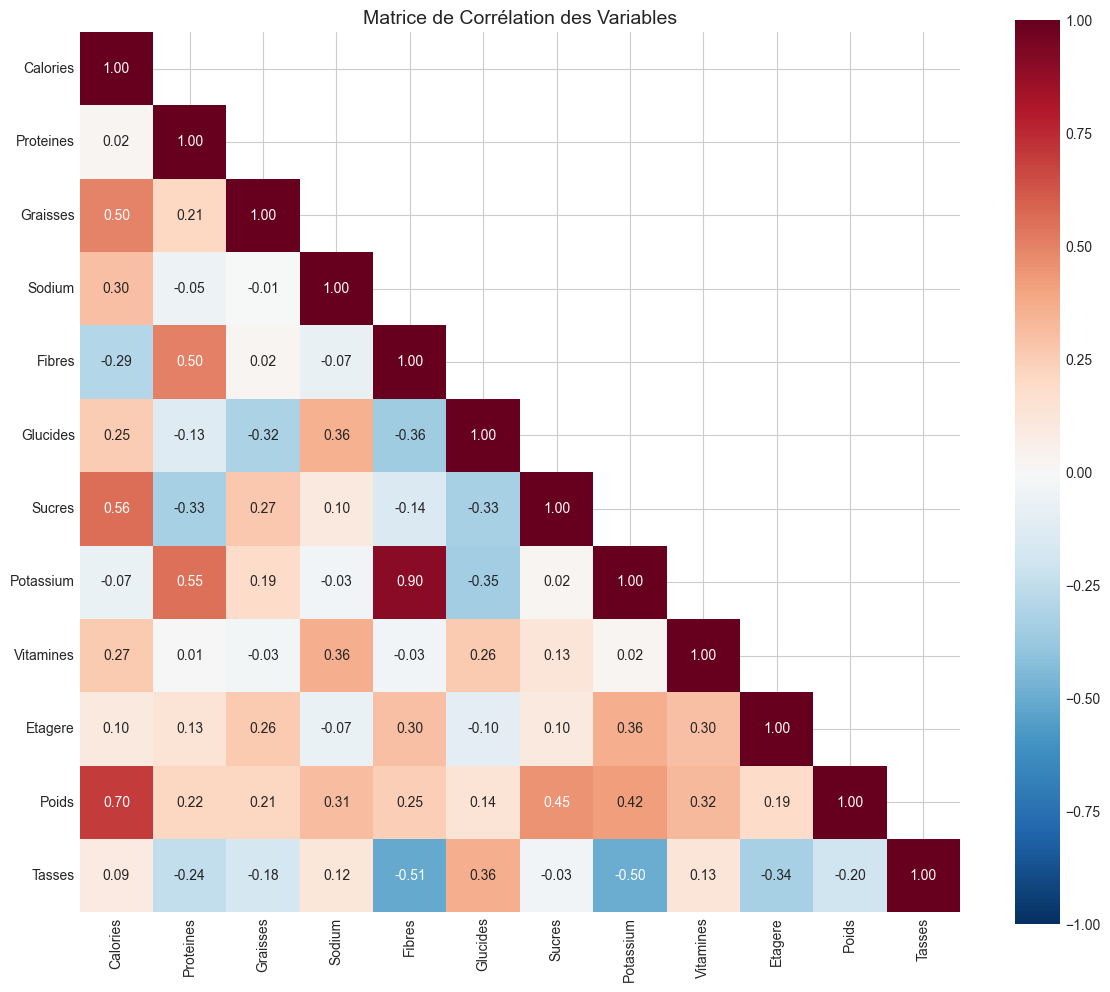

In [7]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, mask=mask, square=True)
plt.title('Matrice de Corrélation des Variables', fontsize=14)
plt.tight_layout()
plt.show()

---
# PHASE 2: CHOIX DES DIMENSIONS (VALEURS PROPRES)

**Questions à répondre:**
- Calculer les valeurs propres (λ)
- Calculer le % de variance expliquée par chaque composante
- Déterminer le nombre d'axes à retenir (scree plot, seuil cumulatif)

## 2.1 Calcul des Valeurs Propres (Eigenvalues)

In [8]:
# Fit PCA with all components
pca = PCA()
pca.fit(Y_df)

# Get eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

# Create eigenvalues table
eigenvalue_table = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Valeur Propre (λ)': eigenvalues,
    '% Variance': variance_ratio * 100,
    '% Cumulé': cumulative_variance * 100
})

print("="*60)
print("VALEURS PROPRES ET VARIANCE EXPLIQUÉE")
print("="*60)
print(eigenvalue_table.round(3).to_string(index=False))

VALEURS PROPRES ET VARIANCE EXPLIQUÉE
Composante  Valeur Propre (λ)  % Variance  % Cumulé
       PC1              3.305      27.186    27.186
       PC2              2.727      22.432    49.617
       PC3              1.700      13.986    63.603
       PC4              1.071       8.807    72.410
       PC5              0.981       8.067    80.477
       PC6              0.694       5.709    86.186
       PC7              0.670       5.510    91.695
       PC8              0.455       3.741    95.436
       PC9              0.305       2.509    97.945
      PC10              0.132       1.088    99.033
      PC11              0.067       0.550    99.583
      PC12              0.051       0.417   100.000


## 2.2 Scree Plot (Éboulis des Valeurs Propres)

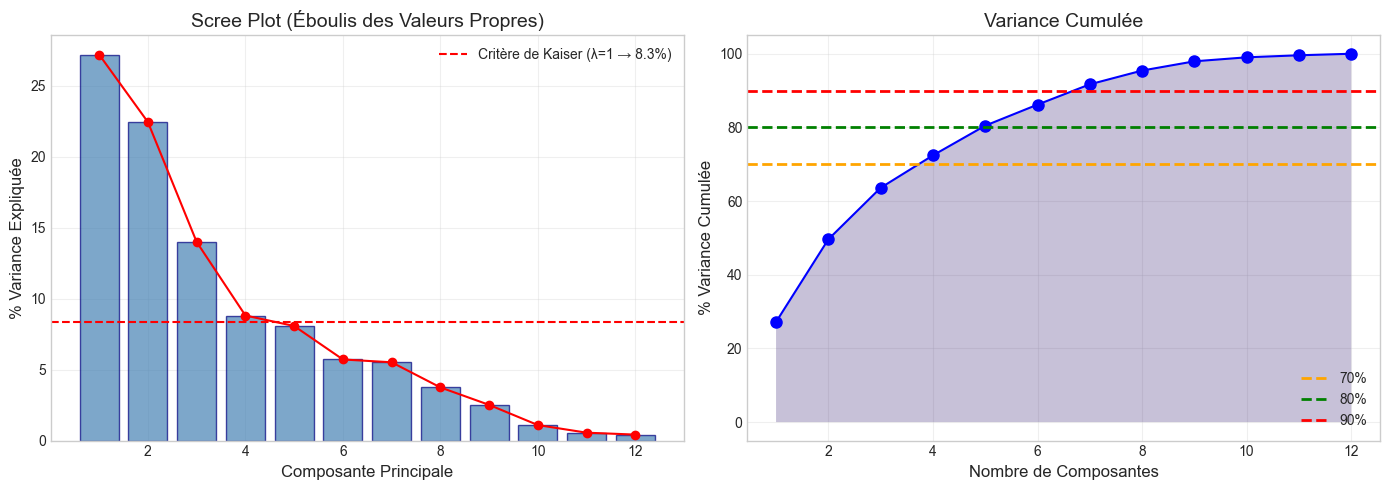

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scree plot (individual variance)
ax1 = axes[0]
components = range(1, len(eigenvalues) + 1)
ax1.bar(components, variance_ratio * 100, alpha=0.7, color='steelblue', edgecolor='navy')
ax1.plot(components, variance_ratio * 100, 'ro-', markersize=6)
ax1.axhline(y=100/len(eigenvalues), color='red', linestyle='--', 
            label=f'Critère de Kaiser (λ=1 → {100/len(eigenvalues):.1f}%)')
ax1.set_xlabel('Composante Principale', fontsize=12)
ax1.set_ylabel('% Variance Expliquée', fontsize=12)
ax1.set_title('Scree Plot (Éboulis des Valeurs Propres)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance
ax2 = axes[1]
ax2.plot(components, cumulative_variance * 100, 'bo-', markersize=8)
ax2.axhline(y=70, color='orange', linestyle='--', linewidth=2, label='70%')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80%')
ax2.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90%')
ax2.fill_between(components, cumulative_variance * 100, alpha=0.3)
ax2.set_xlabel('Nombre de Composantes', fontsize=12)
ax2.set_ylabel('% Variance Cumulée', fontsize=12)
ax2.set_title('Variance Cumulée', fontsize=14)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.3 Choix du Nombre d'Axes à Retenir

In [10]:
# Criteria for selecting number of components
n_70 = np.argmax(cumulative_variance >= 0.70) + 1
n_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_kaiser = np.sum(eigenvalues >= 1)  # Kaiser criterion: eigenvalue >= 1

print("="*60)
print("CHOIX DU NOMBRE D'AXES À RETENIR")
print("="*60)
print(f"\n📊 Critères de sélection:")
print(f"   • Critère de Kaiser (λ ≥ 1): {n_kaiser} composantes")
print(f"   • Seuil 70% variance: {n_70} composantes ({cumulative_variance[n_70-1]*100:.1f}%)")
print(f"   • Seuil 80% variance: {n_80} composantes ({cumulative_variance[n_80-1]*100:.1f}%)")
print(f"   • Seuil 90% variance: {n_90} composantes ({cumulative_variance[n_90-1]*100:.1f}%)")

# Decision
n_components = 2  # We'll use 2 for visualization (first factorial plane)
print(f"\n✅ DÉCISION: Retenir {n_components} axes pour l'analyse")
print(f"   Variance expliquée: {cumulative_variance[n_components-1]*100:.1f}%")
print(f"   Justification: Premier plan factoriel pour visualisation 2D")

CHOIX DU NOMBRE D'AXES À RETENIR

📊 Critères de sélection:
   • Critère de Kaiser (λ ≥ 1): 4 composantes
   • Seuil 70% variance: 4 composantes (72.4%)
   • Seuil 80% variance: 5 composantes (80.5%)
   • Seuil 90% variance: 7 composantes (91.7%)

✅ DÉCISION: Retenir 2 axes pour l'analyse
   Variance expliquée: 49.6%
   Justification: Premier plan factoriel pour visualisation 2D


In [11]:
# Fit PCA with selected components and transform data
pca_final = PCA(n_components=n_components)
F = pca_final.fit_transform(Y_df)  # Scores (coordinates of individuals)

# Create DataFrame for scores
F_df = pd.DataFrame(F, columns=[f'F{i+1}' for i in range(n_components)], index=Y_df.index)

print(f"✓ PCA appliquée avec {n_components} composantes")
print(f"   PC1 explique {pca_final.explained_variance_ratio_[0]*100:.1f}% de la variance")
print(f"   PC2 explique {pca_final.explained_variance_ratio_[1]*100:.1f}% de la variance")

✓ PCA appliquée avec 2 composantes
   PC1 explique 27.2% de la variance
   PC2 explique 22.4% de la variance


---
# PHASE 3: ANALYSE DES VARIABLES (COLONNES)

**Questions à répondre:**
- Projections des variables sur les axes (Loadings)
- Cercle des corrélations
- Qualité de représentation (Cos²) des variables
- Contributions des variables aux axes
- Interprétation des axes

## 3.1 Loadings (Corrélations Variables-Composantes)

In [12]:
# Loadings = correlations between original variables and principal components
# For standardized data: loadings = eigenvectors * sqrt(eigenvalue)
loadings = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)

loadings_df = pd.DataFrame(loadings, 
                           columns=[f'PC{i+1}' for i in range(n_components)],
                           index=numeric_cols)

print("="*60)
print("LOADINGS (CORRÉLATIONS VARIABLES-COMPOSANTES)")
print("="*60)
print("\nCes valeurs représentent les coordonnées des variables")
print("dans le cercle des corrélations.\n")
print(loadings_df.round(3))

LOADINGS (CORRÉLATIONS VARIABLES-COMPOSANTES)

Ces valeurs représentent les coordonnées des variables
dans le cercle des corrélations.

             PC1    PC2
Calories   0.060  0.914
Proteines  0.608 -0.135
Graisses   0.396  0.375
Sodium    -0.104  0.532
Fibres     0.842 -0.299
Glucides  -0.496  0.307
Sucres     0.125  0.627
Potassium  0.914 -0.085
Vitamines  0.029  0.528
Etagere    0.517  0.172
Poids      0.464  0.731
Tasses    -0.688  0.155


## 3.2 Cercle des Corrélations

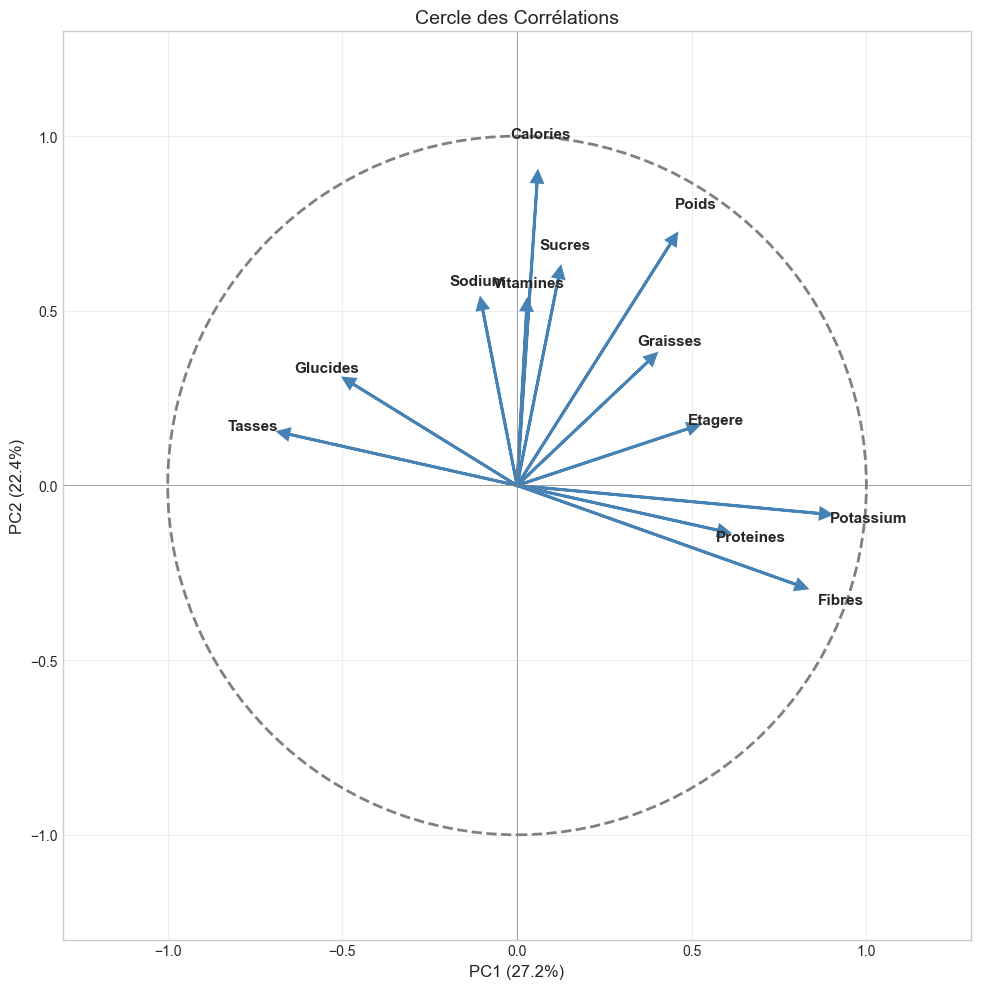

In [13]:
# Correlation Circle
fig, ax = plt.subplots(figsize=(10, 10))

# Draw unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', linewidth=2)
ax.add_patch(circle)

# Plot variables as arrows
for i, var in enumerate(numeric_cols):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, x*0.95, y*0.95, head_width=0.03, head_length=0.03, 
             fc='steelblue', ec='steelblue', linewidth=2)
    # Position label slightly outside the arrow
    ax.text(x*1.1, y*1.1, var, fontsize=11, ha='center', va='center', fontweight='bold')

# Formatting
ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='-', linewidth=0.5)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_aspect('equal')
ax.set_xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax.set_title('Cercle des Corrélations', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.3 Qualité de Représentation des Variables (Cos²)

In [14]:
# Cos² for variables = squared loadings (proportion of variance represented)
cos2_var = loadings_df ** 2
cos2_var['Total'] = cos2_var.sum(axis=1)

print("="*60)
print("QUALITÉ DE REPRÉSENTATION DES VARIABLES (Cos²)")
print("="*60)
print("\nCos² proche de 1 = variable bien représentée sur le plan")
print("Cos² proche de 0 = variable mal représentée (info sur autres axes)\n")
print(cos2_var.round(3))

QUALITÉ DE REPRÉSENTATION DES VARIABLES (Cos²)

Cos² proche de 1 = variable bien représentée sur le plan
Cos² proche de 0 = variable mal représentée (info sur autres axes)

             PC1    PC2  Total
Calories   0.004  0.835  0.839
Proteines  0.369  0.018  0.388
Graisses   0.157  0.140  0.297
Sodium     0.011  0.283  0.294
Fibres     0.710  0.089  0.799
Glucides   0.246  0.094  0.340
Sucres     0.016  0.393  0.408
Potassium  0.836  0.007  0.843
Vitamines  0.001  0.279  0.279
Etagere    0.268  0.029  0.297
Poids      0.215  0.535  0.750
Tasses     0.474  0.024  0.498


In [15]:
# Identify well and poorly represented variables
threshold = 0.5

print(f"\n{'='*60}")
print(f"INTERPRÉTATION (seuil Cos² = {threshold})")
print(f"{'='*60}")

well_represented = cos2_var[cos2_var['Total'] >= threshold].index.tolist()
poorly_represented = cos2_var[cos2_var['Total'] < threshold].index.tolist()

print(f"\n✅ Variables BIEN représentées (Cos² ≥ {threshold}):")
for var in well_represented:
    print(f"   • {var}: {cos2_var.loc[var, 'Total']:.3f}")

print(f"\n⚠️ Variables MAL représentées (Cos² < {threshold}):")
for var in poorly_represented:
    print(f"   • {var}: {cos2_var.loc[var, 'Total']:.3f}")


INTERPRÉTATION (seuil Cos² = 0.5)

✅ Variables BIEN représentées (Cos² ≥ 0.5):
   • Calories: 0.839
   • Fibres: 0.799
   • Potassium: 0.843
   • Poids: 0.750

⚠️ Variables MAL représentées (Cos² < 0.5):
   • Proteines: 0.388
   • Graisses: 0.297
   • Sodium: 0.294
   • Glucides: 0.340
   • Sucres: 0.408
   • Vitamines: 0.279
   • Etagere: 0.297
   • Tasses: 0.498


## 3.4 Contributions des Variables aux Axes

In [16]:
# Contribution of variables = (loading²) / eigenvalue * 100
# This shows which variables "build" each axis
eigenvectors = pca_final.components_.T
contrib_var = (eigenvectors ** 2) * 100  # Already normalized (sum to 100 per PC)

contrib_var_df = pd.DataFrame(contrib_var,
                              columns=[f'Contrib PC{i+1} (%)' for i in range(n_components)],
                              index=numeric_cols)

print("="*60)
print("CONTRIBUTIONS DES VARIABLES AUX AXES (%)")
print("="*60)
print("\nLa somme des contributions = 100% pour chaque axe")
print(f"Contribution moyenne attendue = {100/len(numeric_cols):.1f}%\n")
print(contrib_var_df.round(2))

CONTRIBUTIONS DES VARIABLES AUX AXES (%)

La somme des contributions = 100% pour chaque axe
Contribution moyenne attendue = 8.3%

           Contrib PC1 (%)  Contrib PC2 (%)
Calories              0.11            30.63
Proteines            11.18             0.67
Graisses              4.74             5.15
Sodium                0.33            10.37
Fibres               21.48             3.28
Glucides              7.44             3.45
Sucres                0.47            14.41
Potassium            25.29             0.26
Vitamines             0.03            10.22
Etagere               8.10             1.08
Poids                 6.52            19.61
Tasses               14.34             0.88


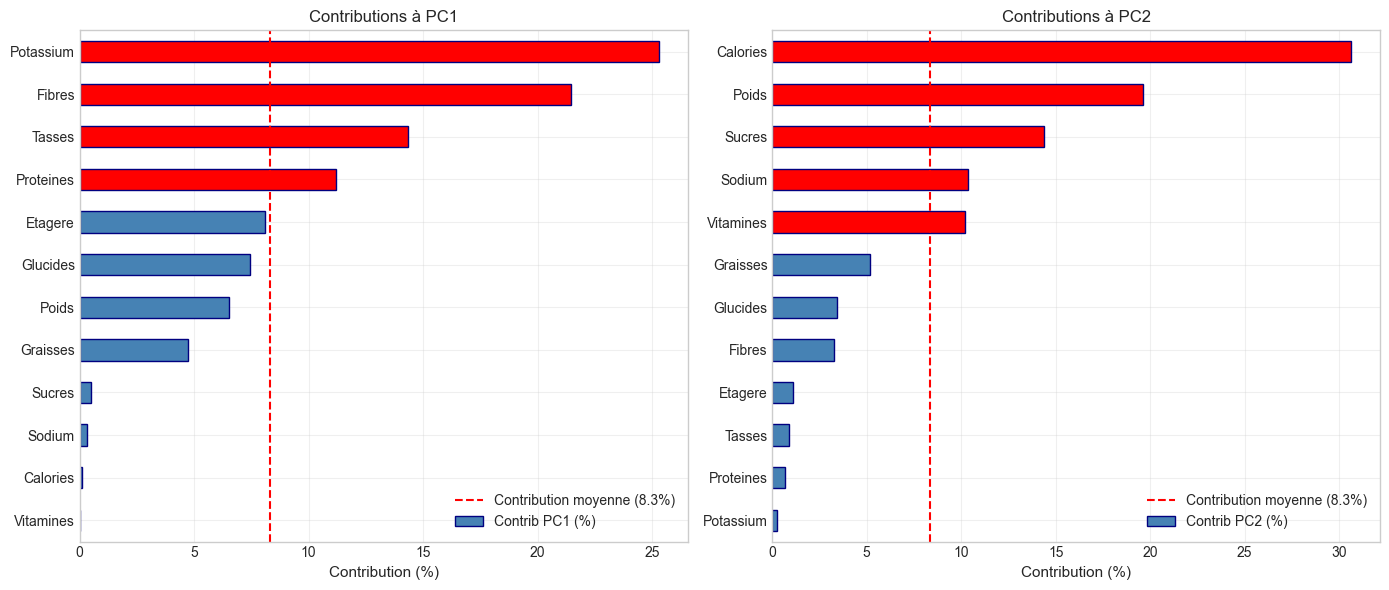

In [17]:
# Visualize contributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, ax in enumerate(axes):
    pc_name = f'Contrib PC{idx+1} (%)'
    sorted_contrib = contrib_var_df[pc_name].sort_values(ascending=True)
    colors = ['red' if v > 100/len(numeric_cols) else 'steelblue' for v in sorted_contrib]
    
    sorted_contrib.plot(kind='barh', ax=ax, color=colors, edgecolor='navy')
    ax.axvline(x=100/len(numeric_cols), color='red', linestyle='--', 
               label=f'Contribution moyenne ({100/len(numeric_cols):.1f}%)')
    ax.set_xlabel('Contribution (%)', fontsize=11)
    ax.set_title(f'Contributions à PC{idx+1}', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.5 Interprétation des Axes

In [18]:
print("="*60)
print("INTERPRÉTATION DES AXES PRINCIPAUX")
print("="*60)

for pc_idx in range(n_components):
    print(f"\n{'─'*50}")
    print(f"AXE {pc_idx+1} (PC{pc_idx+1}) - {pca_final.explained_variance_ratio_[pc_idx]*100:.1f}% variance")
    print(f"{'─'*50}")
    
    # Get loadings for this PC
    pc_loadings = loadings_df[f'PC{pc_idx+1}'].sort_values()
    
    # Variables with positive loadings (right/top of plot)
    positive = pc_loadings[pc_loadings > 0.3].sort_values(ascending=False)
    # Variables with negative loadings (left/bottom of plot)
    negative = pc_loadings[pc_loadings < -0.3].sort_values()
    
    print(f"\n   📈 Corrélations POSITIVES (variables →+ sur l'axe):")
    for var, val in positive.items():
        print(f"      • {var}: {val:+.3f}")
    
    print(f"\n   📉 Corrélations NÉGATIVES (variables →- sur l'axe):")
    for var, val in negative.items():
        print(f"      • {var}: {val:+.3f}")

INTERPRÉTATION DES AXES PRINCIPAUX

──────────────────────────────────────────────────
AXE 1 (PC1) - 27.2% variance
──────────────────────────────────────────────────

   📈 Corrélations POSITIVES (variables →+ sur l'axe):
      • Potassium: +0.914
      • Fibres: +0.842
      • Proteines: +0.608
      • Etagere: +0.517
      • Poids: +0.464
      • Graisses: +0.396

   📉 Corrélations NÉGATIVES (variables →- sur l'axe):
      • Tasses: -0.688
      • Glucides: -0.496

──────────────────────────────────────────────────
AXE 2 (PC2) - 22.4% variance
──────────────────────────────────────────────────

   📈 Corrélations POSITIVES (variables →+ sur l'axe):
      • Calories: +0.914
      • Poids: +0.731
      • Sucres: +0.627
      • Sodium: +0.532
      • Vitamines: +0.528
      • Graisses: +0.375
      • Glucides: +0.307

   📉 Corrélations NÉGATIVES (variables →- sur l'axe):


## 3.6 Analyse des Corrélations entre Variables

In [19]:
# Calculate angles between variables in the correlation circle
print("="*60)
print("CORRÉLATIONS ENTRE VARIABLES (Interprétation des angles)")
print("="*60)
print("\n• Angle ≈ 0° → Variables corrélées positivement")
print("• Angle ≈ 90° → Variables non corrélées")
print("• Angle ≈ 180° → Variables corrélées négativement")

# Find pairs of highly correlated variables (based on original correlation matrix)
print("\n\n📊 Paires de variables les plus corrélées:")
corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_val))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\n   Corrélations les plus FORTES (|r| > 0.5):")
for v1, v2, r in corr_pairs[:8]:
    if abs(r) > 0.5:
        sign = "positif" if r > 0 else "négatif"
        print(f"      • {v1} ↔ {v2}: r = {r:+.3f} ({sign})")

CORRÉLATIONS ENTRE VARIABLES (Interprétation des angles)

• Angle ≈ 0° → Variables corrélées positivement
• Angle ≈ 90° → Variables non corrélées
• Angle ≈ 180° → Variables corrélées négativement


📊 Paires de variables les plus corrélées:

   Corrélations les plus FORTES (|r| > 0.5):
      • Fibres ↔ Potassium: r = +0.903 (positif)
      • Calories ↔ Poids: r = +0.696 (positif)
      • Calories ↔ Sucres: r = +0.562 (positif)
      • Proteines ↔ Potassium: r = +0.549 (positif)
      • Fibres ↔ Tasses: r = -0.513 (négatif)
      • Proteines ↔ Fibres: r = +0.500 (positif)


---
# PHASE 4: ANALYSE DES INDIVIDUS (LIGNES)

**Questions à répondre:**
- Coordonnées (Scores) des individus sur les axes
- Visualisation sur le premier plan factoriel
- Qualité de représentation (Cos²) des individus
- Contributions des individus aux axes
- Identification des clusters et outliers

## 4.1 Coordonnées des Individus (Scores F₁, F₂, ...)

In [20]:
print("="*60)
print("COORDONNÉES DES INDIVIDUS SUR LES AXES PRINCIPAUX")
print("="*60)
print(f"\nDimensions: {F_df.shape[0]} individus × {F_df.shape[1]} composantes")
print("\nAperçu des 10 premiers individus:")
print(F_df.head(10).round(3))

COORDONNÉES DES INDIVIDUS SUR LES AXES PRINCIPAUX

Dimensions: 77 individus × 2 composantes

Aperçu des 10 premiers individus:
                              F1     F2
Nom                                    
100% Bran                  4.868 -2.747
100% Natural Bran          1.725  0.151
All-Bran                   4.723 -2.196
All-Bran with Extra Fiber  5.183 -4.165
Almond Delight            -0.499  0.671
Apple Cinnamon Cheerios   -0.315  0.272
Apple Jacks               -1.130  0.265
Basic 4                    1.056  2.209
Bran Chex                  0.079 -0.860
Bran Flakes                1.619 -1.169


## 4.2 Visualisation des Individus sur le Plan Factoriel

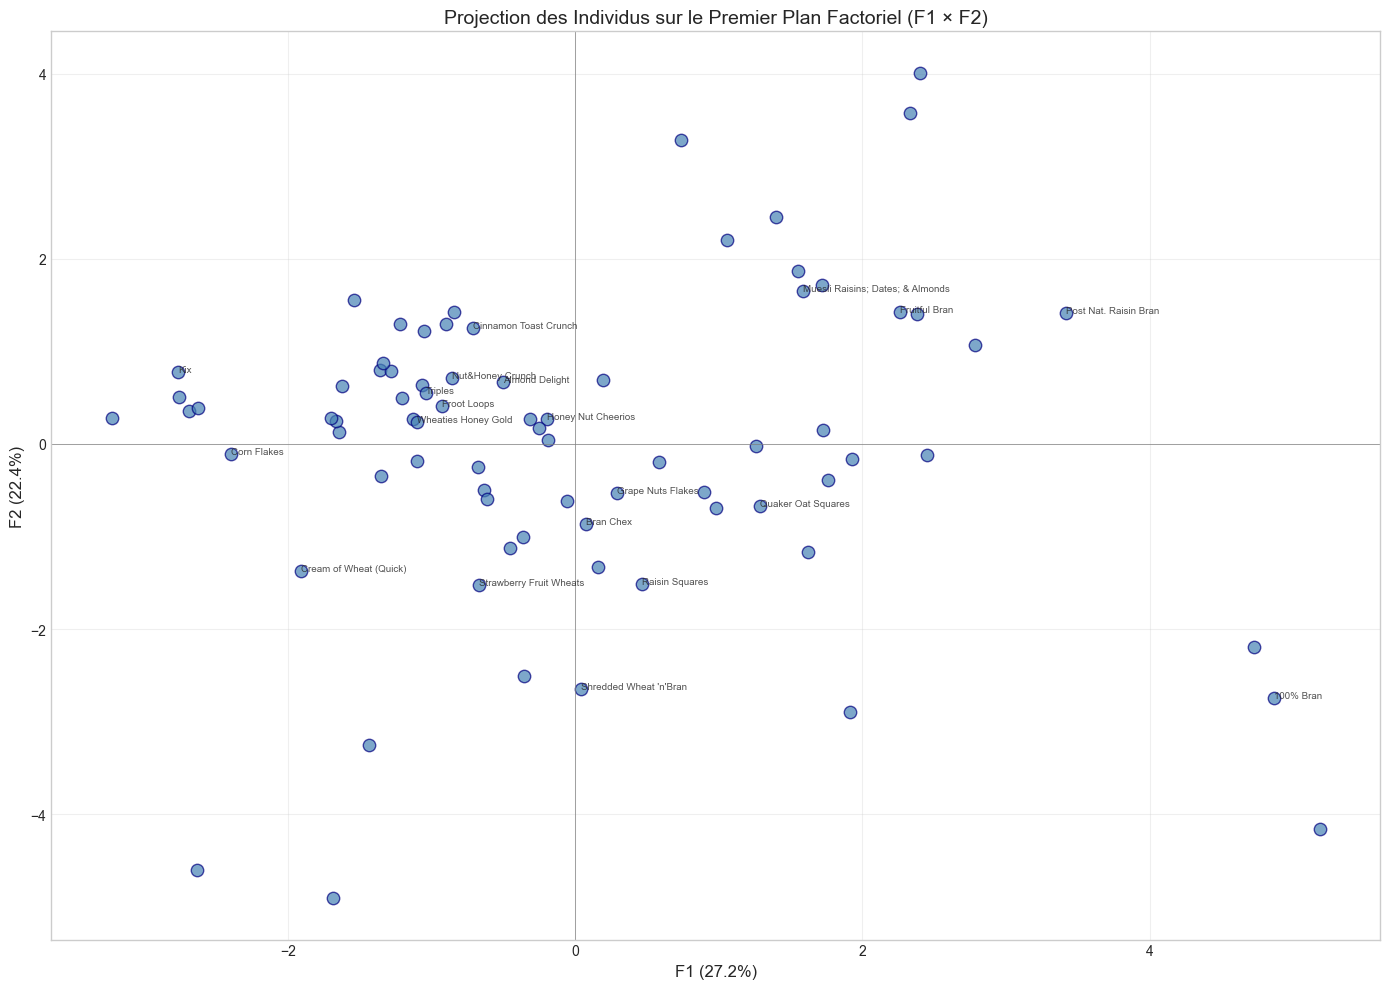

In [21]:
# Plot individuals on the first factorial plane
plt.figure(figsize=(14, 10))

# Scatter plot
plt.scatter(F_df['F1'], F_df['F2'], alpha=0.7, s=80, c='steelblue', edgecolors='navy')

# Add labels for some cereals (to avoid clutter)
for i, cereal in enumerate(F_df.index):
    if i % 4 == 0:  # Label every 4th cereal
        plt.annotate(cereal, (F_df['F1'].iloc[i], F_df['F2'].iloc[i]),
                     fontsize=7, alpha=0.8, ha='left')

# Formatting
plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)
plt.xlabel(f'F1 ({pca_final.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'F2 ({pca_final.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Projection des Individus sur le Premier Plan Factoriel (F1 × F2)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4.3 Qualité de Représentation des Individus (Cos²)

In [22]:
# Cos² for individuals = F² / sum(F²) for each individual
# This measures how well each individual is represented on the selected axes

# Calculate distance from origin for each individual (in full space)
distance_squared = np.sum(Y_df.values ** 2, axis=1)

# Cos² per axis
cos2_ind = F_df ** 2
for col in cos2_ind.columns:
    cos2_ind[col] = cos2_ind[col] / distance_squared

cos2_ind['Total'] = cos2_ind.sum(axis=1)

print("="*60)
print("QUALITÉ DE REPRÉSENTATION DES INDIVIDUS (Cos²)")
print("="*60)
print("\nCos² proche de 1 = individu bien représenté")
print("Cos² proche de 0 = individu mal représenté (info sur autres axes)")
print("\nAperçu (10 premiers individus):")
print(cos2_ind.head(10).round(3))

QUALITÉ DE REPRÉSENTATION DES INDIVIDUS (Cos²)

Cos² proche de 1 = individu bien représenté
Cos² proche de 0 = individu mal représenté (info sur autres axes)

Aperçu (10 premiers individus):
                              F1     F2  Total
Nom                                           
100% Bran                  0.699  0.223  0.922
100% Natural Bran          0.117  0.001  0.118
All-Bran                   0.654  0.141  0.796
All-Bran with Extra Fiber  0.486  0.314  0.801
Almond Delight             0.052  0.095  0.147
Apple Cinnamon Cheerios    0.019  0.014  0.033
Apple Jacks                0.194  0.011  0.204
Basic 4                    0.128  0.560  0.688
Bran Chex                  0.001  0.157  0.159
Bran Flakes                0.361  0.188  0.549


In [23]:
# Statistics on representation quality
threshold_ind = 0.5

well_rep_ind = cos2_ind[cos2_ind['Total'] >= threshold_ind]
poorly_rep_ind = cos2_ind[cos2_ind['Total'] < threshold_ind]

print(f"\n{'='*60}")
print(f"RÉSUMÉ DE LA QUALITÉ DE REPRÉSENTATION")
print(f"{'='*60}")
print(f"\n• Individus bien représentés (Cos² ≥ {threshold_ind}): {len(well_rep_ind)}")
print(f"• Individus mal représentés (Cos² < {threshold_ind}): {len(poorly_rep_ind)}")

print(f"\n\n⚠️ Individus les MOINS bien représentés (à interpréter avec prudence):")
worst_5 = cos2_ind.nsmallest(5, 'Total')
for ind, row in worst_5.iterrows():
    print(f"   • {ind}: Cos² = {row['Total']:.3f}")


RÉSUMÉ DE LA QUALITÉ DE REPRÉSENTATION

• Individus bien représentés (Cos² ≥ 0.5): 25
• Individus mal représentés (Cos² < 0.5): 52


⚠️ Individus les MOINS bien représentés (à interpréter avec prudence):
   • Cheerios: Cos² = 0.002
   • Smacks: Cos² = 0.012
   • Honey Nut Cheerios: Cos² = 0.023
   • Apple Cinnamon Cheerios: Cos² = 0.033
   • Total Whole Grain: Cos² = 0.038


## 4.4 Contributions des Individus aux Axes

In [24]:
# Contribution of individuals = (F² / sum(F²)) * 100 for each axis
# This shows which individuals "drive" each axis

contrib_ind = F_df ** 2
for col in contrib_ind.columns:
    contrib_ind[col] = (contrib_ind[col] / contrib_ind[col].sum()) * 100

contrib_ind.columns = [f'Contrib {col} (%)' for col in F_df.columns]

print("="*60)
print("CONTRIBUTIONS DES INDIVIDUS AUX AXES (%)")
print("="*60)
print(f"\nContribution moyenne attendue = {100/len(F_df):.2f}%")
print("\nAperçu (10 premiers individus):")
print(contrib_ind.head(10).round(3))

CONTRIBUTIONS DES INDIVIDUS AUX AXES (%)

Contribution moyenne attendue = 1.30%

Aperçu (10 premiers individus):
                           Contrib F1 (%)  Contrib F2 (%)
Nom                                                      
100% Bran                           9.435           3.642
100% Natural Bran                   1.185           0.011
All-Bran                            8.882           2.326
All-Bran with Extra Fiber          10.693           8.370
Almond Delight                      0.099           0.217
Apple Cinnamon Cheerios             0.040           0.036
Apple Jacks                         0.509           0.034
Basic 4                             0.444           2.355
Bran Chex                           0.002           0.357
Bran Flakes                         1.044           0.659


In [25]:
# Identify individuals that contribute most to each axis
print(f"\n{'='*60}")
print("INDIVIDUS QUI CONTRIBUENT LE PLUS AUX AXES")
print(f"{'='*60}")

for pc_idx in range(n_components):
    col_name = f'Contrib F{pc_idx+1} (%)'
    top_contributors = contrib_ind[col_name].nlargest(5)
    
    print(f"\n📊 Top 5 contributeurs à l'axe F{pc_idx+1}:")
    for ind, contrib in top_contributors.items():
        coord = F_df.loc[ind, f'F{pc_idx+1}']
        side = "(+)" if coord > 0 else "(-)"
        print(f"   • {ind}: {contrib:.2f}% {side}")


INDIVIDUS QUI CONTRIBUENT LE PLUS AUX AXES

📊 Top 5 contributeurs à l'axe F1:
   • All-Bran with Extra Fiber: 10.69% (+)
   • 100% Bran: 9.43% (+)
   • All-Bran: 8.88% (+)
   • Post Nat. Raisin Bran: 4.66% (+)
   • Rice Chex: 4.14% (-)

📊 Top 5 contributeurs à l'axe F2:
   • Puffed Wheat: 11.63% (-)
   • Puffed Rice: 10.22% (-)
   • All-Bran with Extra Fiber: 8.37% (-)
   • Total Raisin Bran: 7.77% (+)
   • Mueslix Crispy Blend: 6.16% (+)


## 4.5 Identification des Outliers et Groupes

In [26]:
# Identify outliers based on distance from center
F_df['Distance'] = np.sqrt(F_df['F1']**2 + F_df['F2']**2)

# Use IQR method to find outliers
Q1 = F_df['Distance'].quantile(0.25)
Q3 = F_df['Distance'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers = F_df[F_df['Distance'] > outlier_threshold]

print("="*60)
print("ANALYSE DES OUTLIERS")
print("="*60)
print(f"\nSeuil de distance (Q3 + 1.5×IQR): {outlier_threshold:.2f}")
print(f"Nombre d'outliers identifiés: {len(outliers)}")

if len(outliers) > 0:
    print("\n🔴 Outliers (individus extrêmes):")
    for ind, row in outliers.sort_values('Distance', ascending=False).iterrows():
        print(f"   • {ind}: F1={row['F1']:.2f}, F2={row['F2']:.2f}, Distance={row['Distance']:.2f}")
else:
    print("\n✓ Aucun outlier extrême détecté")

# Remove Distance column for later use
F_df = F_df.drop('Distance', axis=1)

ANALYSE DES OUTLIERS

Seuil de distance (Q3 + 1.5×IQR): 4.89
Nombre d'outliers identifiés: 5

🔴 Outliers (individus extrêmes):
   • All-Bran with Extra Fiber: F1=5.18, F2=-4.17, Distance=6.65
   • 100% Bran: F1=4.87, F2=-2.75, Distance=5.59
   • Puffed Rice: F1=-2.63, F2=-4.60, Distance=5.30
   • All-Bran: F1=4.72, F2=-2.20, Distance=5.21
   • Puffed Wheat: F1=-1.69, F2=-4.91, Distance=5.19


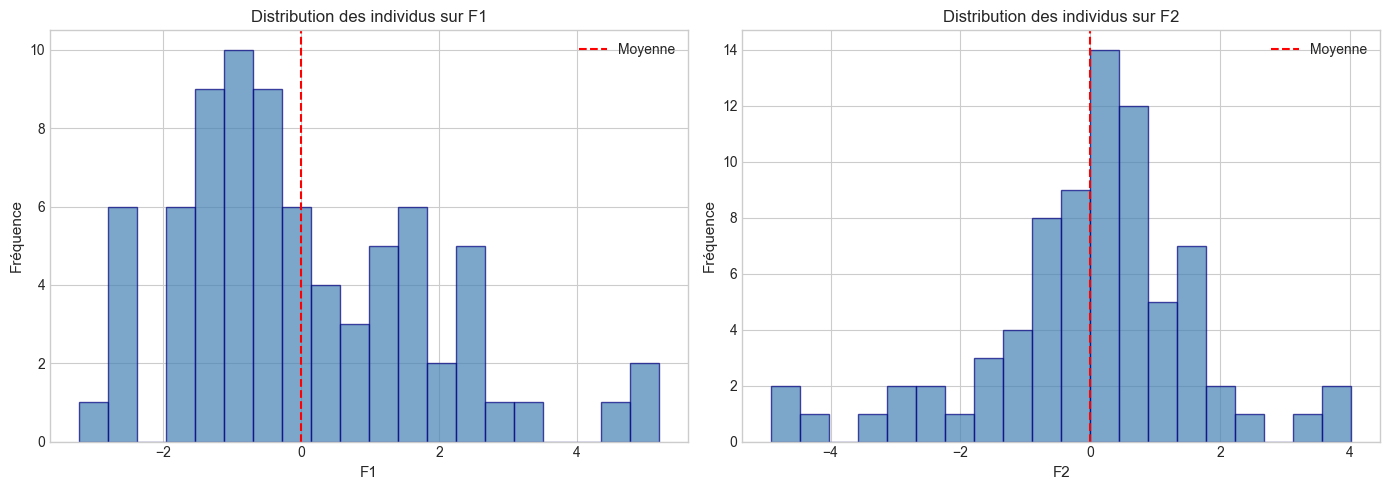

In [27]:
# Visual analysis of distribution and potential clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of individuals along F1
axes[0].hist(F_df['F1'], bins=20, color='steelblue', edgecolor='navy', alpha=0.7)
axes[0].axvline(F_df['F1'].mean(), color='red', linestyle='--', label='Moyenne')
axes[0].set_xlabel('F1', fontsize=11)
axes[0].set_ylabel('Fréquence', fontsize=11)
axes[0].set_title('Distribution des individus sur F1', fontsize=12)
axes[0].legend()

# Distribution of individuals along F2
axes[1].hist(F_df['F2'], bins=20, color='steelblue', edgecolor='navy', alpha=0.7)
axes[1].axvline(F_df['F2'].mean(), color='red', linestyle='--', label='Moyenne')
axes[1].set_xlabel('F2', fontsize=11)
axes[1].set_ylabel('Fréquence', fontsize=11)
axes[1].set_title('Distribution des individus sur F2', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

---
# PHASE 5: SYNTHÈSE ET INTERPRÉTATION

**Questions à répondre:**
- Interprétation conjointe variables/individus
- Reconstruction des données et calcul de l'erreur

## 5.1 Interprétation Conjointe (Biplot)

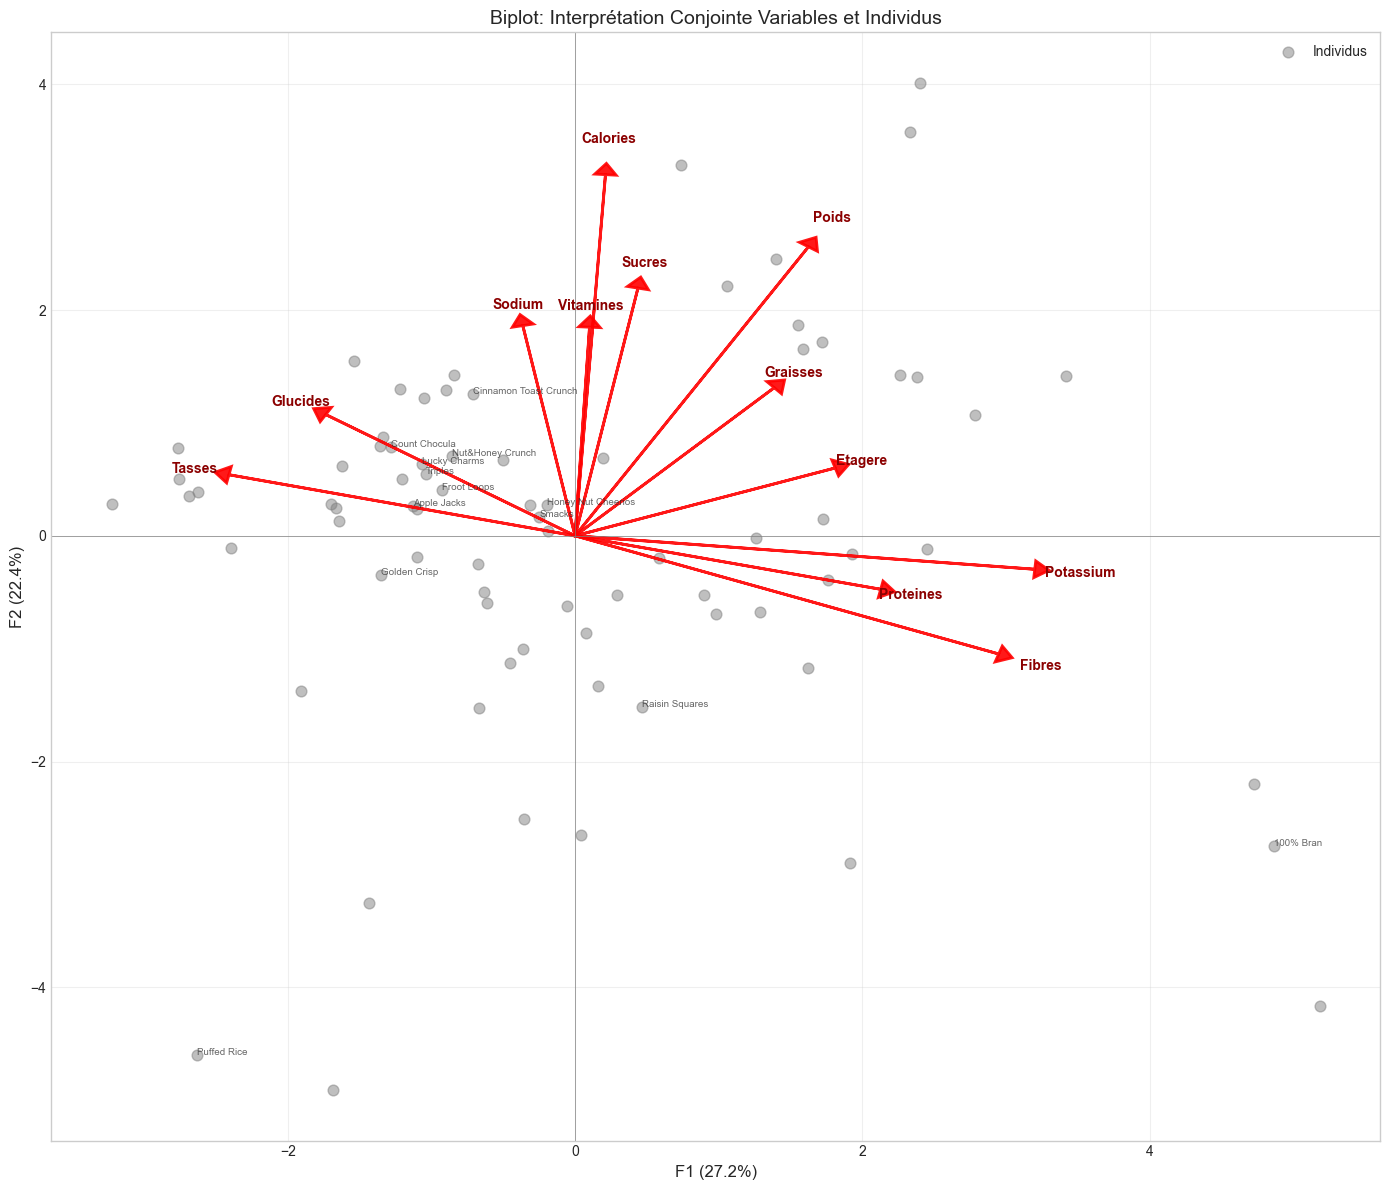

In [28]:
# Combined Biplot: individuals + variables
fig, ax = plt.subplots(figsize=(14, 12))

# Plot individuals
ax.scatter(F_df['F1'], F_df['F2'], alpha=0.5, s=60, c='gray', label='Individus')

# Label some individuals
for i, cereal in enumerate(F_df.index):
    if i % 6 == 0:
        ax.annotate(cereal, (F_df['F1'].iloc[i], F_df['F2'].iloc[i]),
                    fontsize=7, alpha=0.7)

# Plot variables (scaled for visibility)
scale = 3.5  # Scale factor for arrows
for i, var in enumerate(numeric_cols):
    x, y = loadings[i, 0] * scale, loadings[i, 1] * scale
    ax.arrow(0, 0, x, y, head_width=0.15, head_length=0.1, 
             fc='red', ec='red', alpha=0.9, linewidth=2)
    ax.text(x*1.1, y*1.1, var, fontsize=10, ha='center', va='center', 
            fontweight='bold', color='darkred')

# Formatting
ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel(f'F1 ({pca_final.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'F2 ({pca_final.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax.set_title('Biplot: Interprétation Conjointe Variables et Individus', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [29]:
# Joint interpretation
print("="*60)
print("INTERPRÉTATION CONJOINTE")
print("="*60)

# Analyze quadrants
print("\n📊 Analyse par quadrant du plan factoriel:")

# Quadrant 1: F1+ F2+
q1 = F_df[(F_df['F1'] > 0) & (F_df['F2'] > 0)]
# Quadrant 2: F1- F2+
q2 = F_df[(F_df['F1'] < 0) & (F_df['F2'] > 0)]
# Quadrant 3: F1- F2-
q3 = F_df[(F_df['F1'] < 0) & (F_df['F2'] < 0)]
# Quadrant 4: F1+ F2-
q4 = F_df[(F_df['F1'] > 0) & (F_df['F2'] < 0)]

print(f"\n   Quadrant 1 (F1+, F2+): {len(q1)} individus")
print(f"   Quadrant 2 (F1-, F2+): {len(q2)} individus")
print(f"   Quadrant 3 (F1-, F2-): {len(q3)} individus")
print(f"   Quadrant 4 (F1+, F2-): {len(q4)} individus")

INTERPRÉTATION CONJOINTE

📊 Analyse par quadrant du plan factoriel:

   Quadrant 1 (F1+, F2+): 14 individus
   Quadrant 2 (F1-, F2+): 30 individus
   Quadrant 3 (F1-, F2-): 15 individus
   Quadrant 4 (F1+, F2-): 18 individus


## 5.2 Reconstruction des Données et Erreur d'Approximation

In [30]:
# Reconstruct data from first k components
# X_reconstructed = F @ V^T (in standardized space)

Y_reconstructed = pca_final.inverse_transform(F)
Y_reconstructed_df = pd.DataFrame(Y_reconstructed, columns=numeric_cols, index=Y_df.index)

print("="*60)
print("RECONSTRUCTION DES DONNÉES")
print("="*60)
print(f"\nReconstruction à partir de {n_components} composantes principales")
print("\nComparaison Original vs Reconstruit (premier individu):")

comparison = pd.DataFrame({
    'Original (Y)': Y_df.iloc[0].values,
    'Reconstruit': Y_reconstructed_df.iloc[0].values,
    'Différence': Y_df.iloc[0].values - Y_reconstructed_df.iloc[0].values
}, index=numeric_cols)

print(f"\nIndividu: {Y_df.index[0]}")
print(comparison.round(3))

RECONSTRUCTION DES DONNÉES

Reconstruction à partir de 2 composantes principales

Comparaison Original vs Reconstruit (premier individu):

Individu: 100% Bran
           Original (Y)  Reconstruit  Différence
Calories         -1.905       -1.359      -0.547
Proteines         1.337        1.853      -0.515
Graisses         -0.013        0.437      -0.450
Sodium           -0.356       -1.163       0.807
Fibres            3.314        2.753       0.561
Glucides         -2.258       -1.838      -0.420
Sucres           -0.209       -0.708       0.499
Potassium         2.597        2.589       0.008
Vitamines        -0.146       -0.801       0.655
Etagere           0.958        1.100      -0.142
Poids            -0.198        0.026      -0.224
Tasses           -2.124       -2.100      -0.024


In [31]:
# Calculate reconstruction error (SSE)
reconstruction_error = np.sum((Y_df.values - Y_reconstructed) ** 2)
total_variance = np.sum(Y_df.values ** 2)

# Error per individual
error_per_ind = np.sum((Y_df.values - Y_reconstructed) ** 2, axis=1)

print(f"\n{'='*60}")
print("ERREUR D'APPROXIMATION")
print(f"{'='*60}")
print(f"\n📐 Somme des carrés des erreurs (SSE): {reconstruction_error:.2f}")
print(f"📐 Variance totale: {total_variance:.2f}")
print(f"📐 Proportion de variance NON expliquée: {reconstruction_error/total_variance*100:.1f}%")
print(f"📐 Proportion de variance expliquée: {(1 - reconstruction_error/total_variance)*100:.1f}%")

print(f"\n\n🔍 Vérification: ceci devrait correspondre à la variance expliquée")
print(f"   par les {n_components} premières composantes = {cumulative_variance[n_components-1]*100:.1f}%")


ERREUR D'APPROXIMATION

📐 Somme des carrés des erreurs (SSE): 465.53
📐 Variance totale: 924.00
📐 Proportion de variance NON expliquée: 50.4%
📐 Proportion de variance expliquée: 49.6%


🔍 Vérification: ceci devrait correspondre à la variance expliquée
   par les 2 premières composantes = 49.6%


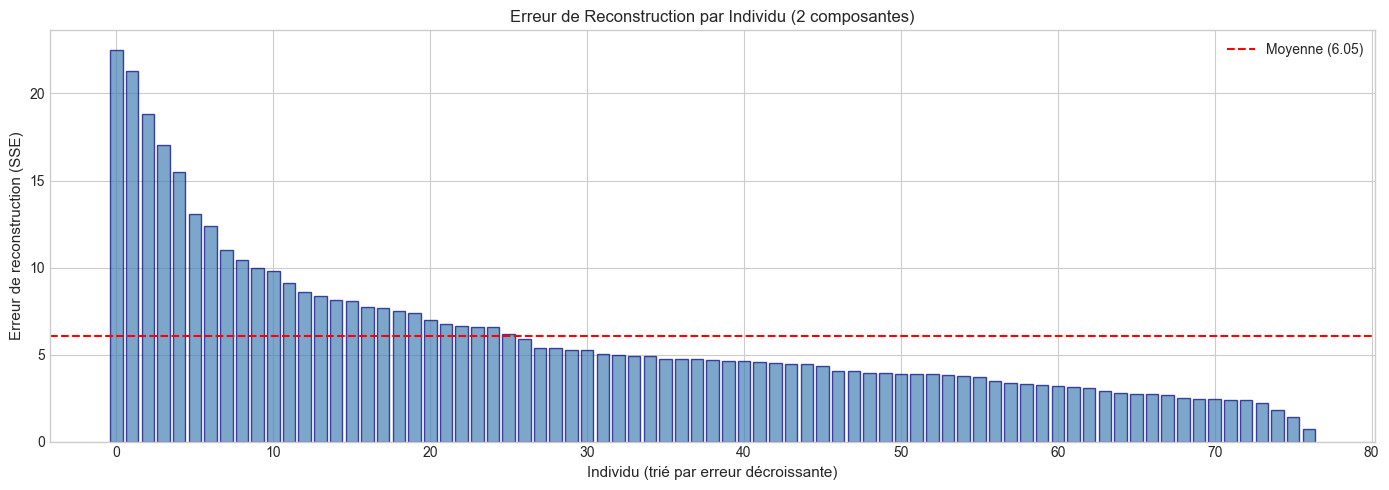


Individus avec la plus grande erreur de reconstruction:
   • 100% Natural Bran: SSE = 22.50
   • Cheerios: SSE = 21.27
   • Quaker Oatmeal: SSE = 18.81
   • Product 19: SSE = 17.02
   • Special K: SSE = 15.47


In [32]:
# Visualize reconstruction error per individual
plt.figure(figsize=(14, 5))

# Sort by error for visualization
error_series = pd.Series(error_per_ind, index=Y_df.index).sort_values(ascending=False)

plt.bar(range(len(error_series)), error_series.values, color='steelblue', edgecolor='navy', alpha=0.7)
plt.axhline(y=error_series.mean(), color='red', linestyle='--', label=f'Moyenne ({error_series.mean():.2f})')
plt.xlabel('Individu (trié par erreur décroissante)', fontsize=11)
plt.ylabel('Erreur de reconstruction (SSE)', fontsize=11)
plt.title(f'Erreur de Reconstruction par Individu ({n_components} composantes)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("\nIndividus avec la plus grande erreur de reconstruction:")
for ind, err in error_series.head(5).items():
    print(f"   • {ind}: SSE = {err:.2f}")

## 5.3 Résumé Final

In [33]:
print("\n" + "="*70)
print("                    RÉSUMÉ DE L'ANALYSE ACP")
print("="*70)

print(f"""
📊 DONNÉES
   • {Y_df.shape[0]} individus (céréales)
   • {Y_df.shape[1]} variables numériques
   • Données standardisées (centrées-réduites)

📈 RÉDUCTION DE DIMENSION
   • Critère de Kaiser (λ≥1): {n_kaiser} composantes
   • Composantes retenues: {n_components}
   • Variance expliquée: {cumulative_variance[n_components-1]*100:.1f}%

🎯 AXES PRINCIPAUX
   • PC1 ({pca_final.explained_variance_ratio_[0]*100:.1f}%):
     Variables dominantes: {', '.join(loadings_df['PC1'].abs().nlargest(3).index.tolist())}
   • PC2 ({pca_final.explained_variance_ratio_[1]*100:.1f}%):
     Variables dominantes: {', '.join(loadings_df['PC2'].abs().nlargest(3).index.tolist())}

✅ QUALITÉ DE REPRÉSENTATION
   • Variables bien représentées: {len(well_represented)}/{len(numeric_cols)}
   • Individus bien représentés: {len(well_rep_ind)}/{len(F_df)}

📐 ERREUR D'APPROXIMATION
   • Proportion variance non expliquée: {reconstruction_error/total_variance*100:.1f}%
""")

print("\n✓ Analyse ACP terminée!")


                    RÉSUMÉ DE L'ANALYSE ACP

📊 DONNÉES
   • 77 individus (céréales)
   • 12 variables numériques
   • Données standardisées (centrées-réduites)

📈 RÉDUCTION DE DIMENSION
   • Critère de Kaiser (λ≥1): 4 composantes
   • Composantes retenues: 2
   • Variance expliquée: 49.6%

🎯 AXES PRINCIPAUX
   • PC1 (27.2%):
     Variables dominantes: Potassium, Fibres, Tasses
   • PC2 (22.4%):
     Variables dominantes: Calories, Poids, Sucres

✅ QUALITÉ DE REPRÉSENTATION
   • Variables bien représentées: 4/12
   • Individus bien représentés: 25/77

📐 ERREUR D'APPROXIMATION
   • Proportion variance non expliquée: 50.4%


✓ Analyse ACP terminée!
